In [43]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading Data

In [2]:
cleaned = pd.read_csv('datasets/cleaned_Izends_Data_Thru201712_ver5.csv',index_col=0)

/home/ambuj/izenda_fullcycle/environment/env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Making Bins

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
y = cleaned['EstimateTotal']

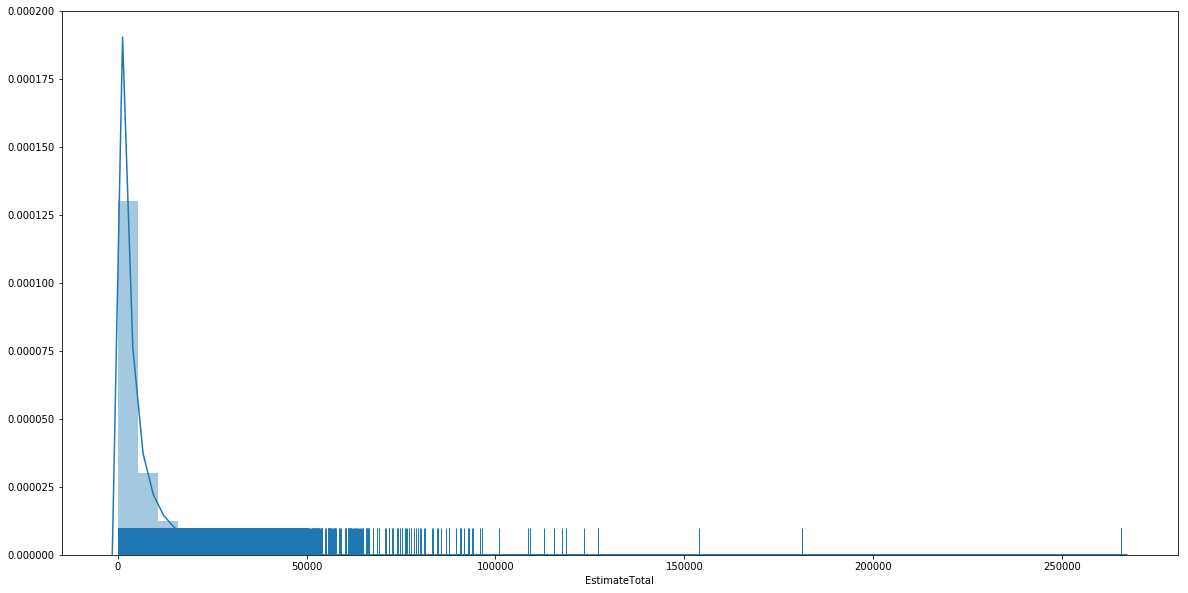

In [5]:
plt.figure(figsize=(20,10))
sns.distplot(y,hist=True,rug=True)
plt.show()

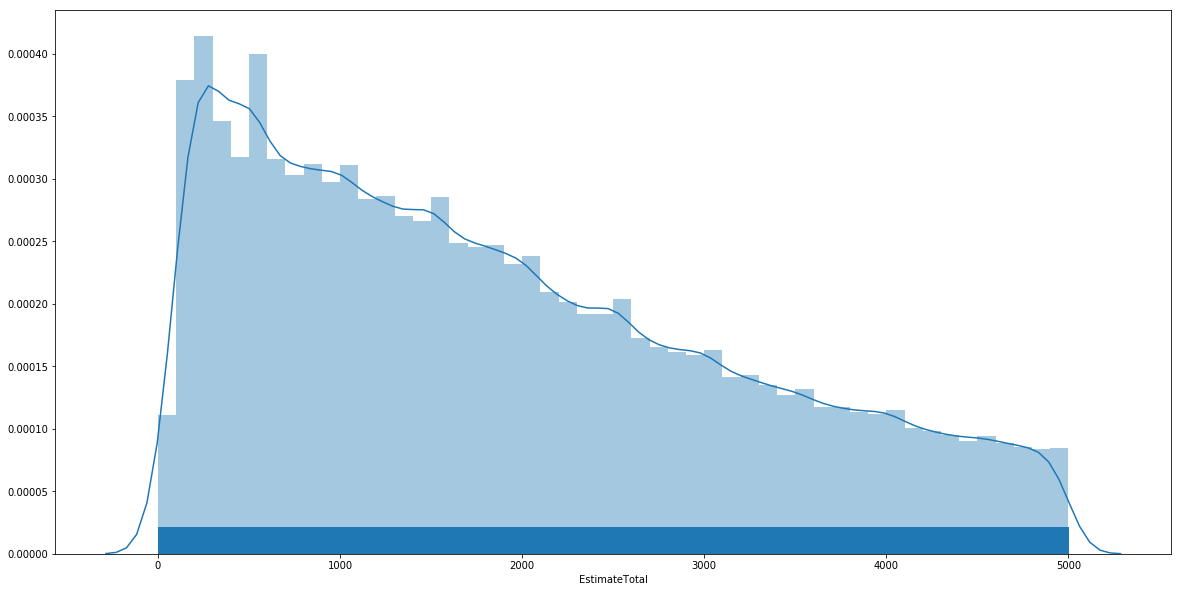

In [6]:
y1 = cleaned[cleaned['EstimateTotal'] < 5000]['EstimateTotal']

plt.figure(figsize=(20,10))
sns.distplot(y1,hist=True,rug=True)
plt.show()

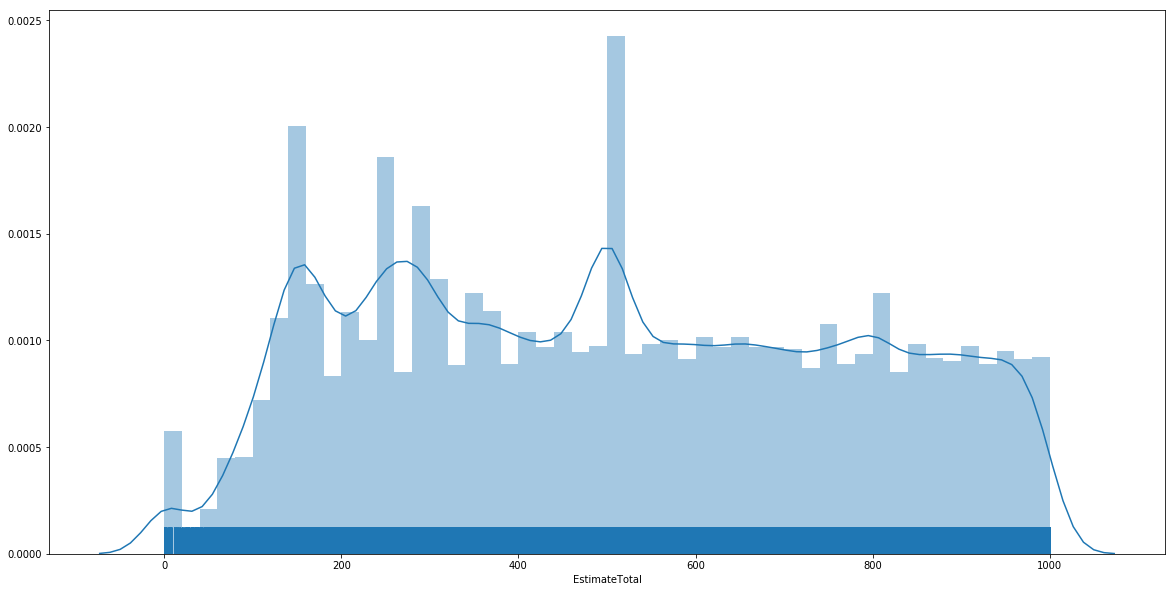

In [7]:
y2 = cleaned[cleaned['EstimateTotal'] < 1000]['EstimateTotal']

plt.figure(figsize=(20,10))
sns.distplot(y2,hist=True,rug=True)
plt.show()

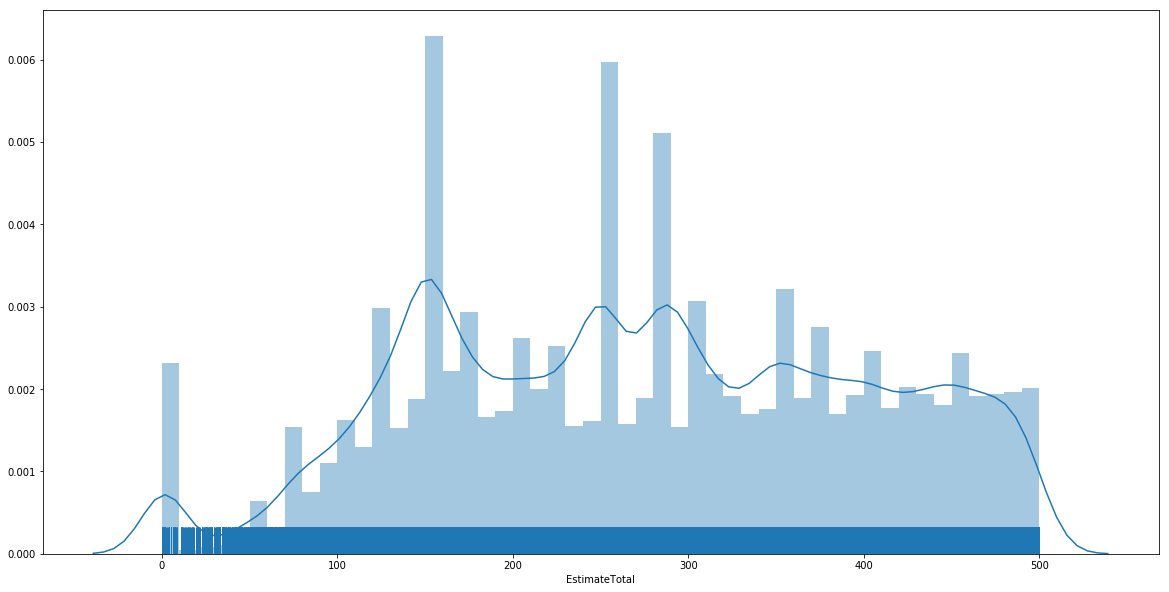

In [8]:
y3 = cleaned[cleaned['EstimateTotal'] < 500]['EstimateTotal']

plt.figure(figsize=(20,10))
sns.distplot(y3,hist=True,rug=True)
plt.show()

In [9]:
len(y), len(y1), len(y2), len(y3)

(768109, 517076, 165155, 81056)

In [10]:
cleaned[cleaned['EstimateTotal'] < 0]

,DisplayName,DivisionName,City,Zip,State,LossYearMo,StartedFlag,CommOrRes,NoteCount,PhotoCount,...,Estimate_MaterialSaleTax,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID,LossMo


In [11]:
pd.qcut(cleaned['EstimateTotal'],20).value_counts().sort_index(ascending=True)

(-0.0009999999999716, 258.954]    38406
(258.954, 473.858]                38405
(473.858, 682.512]                38406
(682.512, 924.45]                 38406
(924.45, 1173.07]                 38406
(1173.07, 1440.776]               38404
(1440.776, 1720.8]                38406
(1720.8, 2023.22]                 38406
(2023.22, 2386.296]               38404
(2386.296, 2790.25]               38406
(2790.25, 3270.964]               38405
(3270.964, 3864.438]              38405
(3864.438, 4597.88]               38407
(4597.88, 5518.024]               38404
(5518.024, 6686.31]               38407
(6686.31, 8323.462]               38404
(8323.462, 10611.558]             38405
(10611.558, 14225.2]              38406
(14225.2, 21130.806]              38405
(21130.806, 265738.05]            38406
Name: EstimateTotal, dtype: int64

In [12]:
pd.qcut(cleaned['EstimateTotal'],10).value_counts().sort_index(ascending=True)

(-0.0009999999999716, 473.858]    76811
(473.858, 924.45]                 76812
(924.45, 1440.776]                76810
(1440.776, 2023.22]               76812
(2023.22, 2790.25]                76810
(2790.25, 3864.438]               76810
(3864.438, 5518.024]              76811
(5518.024, 8323.462]              76811
(8323.462, 14225.2]               76811
(14225.2, 265738.05]              76811
Name: EstimateTotal, dtype: int64

## Trying with 10 bins

#### Adding the bins columns

In [14]:
cleaned['EstimateTotal_bins'] = pd.qcut(cleaned['EstimateTotal'],10,labels = ["a", "b", "c", "d","e","f","g","h","i","j"])

In [15]:
cleaned.head()

,DisplayName,DivisionName,City,Zip,State,LossYearMo,StartedFlag,CommOrRes,NoteCount,PhotoCount,...,Estimate_OverHead,Estimate_Profit,Estimate_PctOverhead,Estimate_PctProfit,Estimate_Deductible,Estimate_BaseSvcCharge,CleanAddressFranchisorID,CleanAddressContactID,LossMo,EstimateTotal_bins
2,Consulting,Inventory,dallas,75243,TX,201712,0,Residential,1.000,0,...,0,0,0,0,0,0,7,66150,12,g
12,Contents,Lyons Textile Restoration,charlotte,28227,NC,201405,0,Residential,20.000,99,...,0,0,0,0,0,0,7,2058,5,g
20,Contents,Lyons Textile Restoration,statesville,28677,NC,201410,0,Residential,7.000,6,...,0,0,0,0,0,0,7,3658,10,a
21,Contents,Lyons Textile Restoration,woodruff,29388,SC,201410,1,Residential,18.000,81,...,0,0,0,0,0,0,7,3704,10,g
25,Contents,Lyons Textile Restoration,hillsborough,27278,NC,201412,1,Residential,25.000,109,...,0,0,0,0,0,0,7,4139,12,i


# MODEL 1

## Using the following features:
    
1) CommOrRes  
2) JobCount  
3) ClaimCount  
4) NoteCount  
5) PhotoCount  
6) PolicyHolderType  

#### Making Dummies

In [16]:
cleaned_X = cleaned[['CommOrRes','PolicyHolderType','NoteCount','PhotoCount','JobCount','ClaimCount','EstimateTotal','LossYearMo']]

In [17]:
cleaned_X.nunique(), cleaned_X.dtypes

(CommOrRes                3
 PolicyHolderType         2
 NoteCount              378
 PhotoCount            1313
 JobCount                21
 ClaimCount               8
 EstimateTotal       506482
 LossYearMo             177
 dtype: int64, CommOrRes            object
 PolicyHolderType     object
 NoteCount           float64
 PhotoCount            int64
 JobCount              int64
 ClaimCount            int64
 EstimateTotal       float64
 LossYearMo            int64
 dtype: object)

In [18]:
cleaned_X_dummies = pd.get_dummies(cleaned_X,sparse=True)

In [19]:
cleaned_y = cleaned['EstimateTotal_bins']

In [20]:
cleaned_X_dummies['EstimateTotal_bins'] = cleaned_y

In [21]:
cleaned_X_dummies.head()

,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,LossYearMo,CommOrRes_Commercial,CommOrRes_Other,CommOrRes_Residential,PolicyHolderType_Company,PolicyHolderType_Individual,EstimateTotal_bins
2,1.000,0,1,1,5241.890,201712,0,0,1,0,1,g
12,20.000,99,1,1,5149.060,201405,0,0,1,0,1,g
20,7.000,6,1,1,211.520,201410,0,0,1,0,1,a
21,18.000,81,1,1,5010.550,201410,0,0,1,0,1,g
25,25.000,109,1,1,11523.380,201412,0,0,1,0,1,i


#### Separating 2017 Test Data

In [22]:
test2017=cleaned_X_dummies[cleaned_X_dummies["LossYearMo"].apply(lambda x:x>=201701)]

In [23]:
learning=cleaned_X_dummies[cleaned_X_dummies["LossYearMo"].apply(lambda x:x<201701)]

In [24]:
learning.columns

Index(['NoteCount', 'PhotoCount', 'JobCount', 'ClaimCount', 'EstimateTotal',
       'LossYearMo', 'CommOrRes_Commercial', 'CommOrRes_Other',
       'CommOrRes_Residential', 'PolicyHolderType_Company',
       'PolicyHolderType_Individual', 'EstimateTotal_bins'],
      dtype='object')

In [25]:
X = learning[learning.columns.difference(['LossYearMo','EstimateTotal','EstimateTotal_bins'])]

In [26]:
X.head()

,ClaimCount,CommOrRes_Commercial,CommOrRes_Other,CommOrRes_Residential,JobCount,NoteCount,PhotoCount,PolicyHolderType_Company,PolicyHolderType_Individual
12,1,0,0,1,1,20.000,99,0,1
20,1,0,0,1,1,7.000,6,0,1
21,1,0,0,1,1,18.000,81,0,1
25,1,0,0,1,1,25.000,109,0,1
26,1,0,0,1,1,16.000,49,0,1


In [27]:
y_bins = learning['EstimateTotal_bins']

In [28]:
y_bins.head()

12    g
20    a
21    g
25    i
26    b
Name: EstimateTotal_bins, dtype: category
Categories (10, object): [a < b < c < d ... g < h < i < j]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_bins, test_size=0.33, random_state=42)

In [30]:
test2017_X = test2017[test2017.columns.difference(['LossYearMo','EstimateTotal','EstimateTotal_bins'])]

In [31]:
test2017_y = test2017['EstimateTotal_bins']

#### Modelling

In [32]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [33]:
alg = XGBClassifier( colsample_bytree=0.8, gamma=0, learning_rate=0.1,
    max_depth=5, min_child_weight=1, n_estimators=5000, objective="multi:softprob",
    reg_alpha=0, reg_lambda=0,
    seed=7, silent=True, subsample=0.8,n_jobs=5)

In [34]:
eval_set = [(X_val,y_val)]

In [35]:
alg.fit(X_train, y_train,eval_metric='mlogloss', early_stopping_rounds=50, eval_set = eval_set, verbose = True)

[0]	validation_0-mlogloss:2.29407
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:2.28704
[2]	validation_0-mlogloss:2.28232
[3]	validation_0-mlogloss:2.27743
[4]	validation_0-mlogloss:2.27378
[5]	validation_0-mlogloss:2.26902
[6]	validation_0-mlogloss:2.26616
[7]	validation_0-mlogloss:2.26271
[8]	validation_0-mlogloss:2.25964
[9]	validation_0-mlogloss:2.25632
[10]	validation_0-mlogloss:2.25338
[11]	validation_0-mlogloss:2.25067
[12]	validation_0-mlogloss:2.24823
[13]	validation_0-mlogloss:2.24664
[14]	validation_0-mlogloss:2.24485
[15]	validation_0-mlogloss:2.24281
[16]	validation_0-mlogloss:2.24145
[17]	validation_0-mlogloss:2.24001
[18]	validation_0-mlogloss:2.23901
[19]	validation_0-mlogloss:2.23782
[20]	validation_0-mlogloss:2.23635
[21]	validation_0-mlogloss:2.23514
[22]	validation_0-mlogloss:2.23406
[23]	validation_0-mlogloss:2.23319
[24]	validation_0-mlogloss:2.23225
[25]	validation_0-mlogloss:2.23132
[26]	validation_0-mlogloss:2.23

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=5, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=7, silent=True,
       subsample=0.8)

In [36]:
test2017_preds = alg.predict(test2017_X)

In [37]:
accuracy_score(test2017_y,test2017_preds)

0.16996762735488513

# MODEL 2

## Using the following features:
    
1) CommOrRes  
2) JobCount  
3) ClaimCount  
4) NoteCount  
5) PhotoCount  
6) PolicyHolderType  
7) Display Name  
8) Division Name  
9) Month

#### Making Dummies

In [45]:
cleaned.columns

Index(['DisplayName', 'DivisionName', 'City', 'Zip', 'State', 'LossYearMo',
       'StartedFlag', 'CommOrRes', 'NoteCount', 'PhotoCount', 'JobCount',
       'ClaimCount', 'EstimateTotal', 'PolicyHolderType', 'LossDescription',
       'Estimate_NetClaim', 'Estimate_MaterialSaleTax', 'Estimate_OverHead',
       'Estimate_Profit', 'Estimate_PctOverhead', 'Estimate_PctProfit',
       'Estimate_Deductible', 'Estimate_BaseSvcCharge',
       'CleanAddressFranchisorID', 'CleanAddressContactID', 'LossMo',
       'EstimateTotal_bins'],
      dtype='object')

In [47]:
cleaned_X_mod2 = cleaned[['DisplayName', 'DivisionName','LossMo','CommOrRes','PolicyHolderType','NoteCount','PhotoCount','JobCount','ClaimCount','EstimateTotal','LossYearMo']]

In [48]:
cleaned_X_mod2.nunique(), cleaned_X_mod2.dtypes

(DisplayName             17
 DivisionName          1037
 LossMo                  12
 CommOrRes                3
 PolicyHolderType         2
 NoteCount              378
 PhotoCount            1313
 JobCount                21
 ClaimCount               8
 EstimateTotal       506482
 LossYearMo             177
 dtype: int64, DisplayName          object
 DivisionName         object
 LossMo                int64
 CommOrRes            object
 PolicyHolderType     object
 NoteCount           float64
 PhotoCount            int64
 JobCount              int64
 ClaimCount            int64
 EstimateTotal       float64
 LossYearMo            int64
 dtype: object)

In [49]:
cleaned_X_mod2_dummies = pd.get_dummies(cleaned_X_mod2,sparse=True)

In [50]:
cleaned_y_mod2 = cleaned['EstimateTotal_bins']

In [51]:
cleaned_X_mod2_dummies['EstimateTotal_bins'] = cleaned_y_mod2

In [52]:
cleaned_X_mod2_dummies.head()

,LossMo,NoteCount,PhotoCount,JobCount,ClaimCount,EstimateTotal,LossYearMo,DisplayName_BioHazard,DisplayName_Carpet Cleaning,DisplayName_Consulting,...,DivisionName_xFire,DivisionName_xMold Remediation,DivisionName_xWater Mitigation,DivisionName_Évaluation et inspection,CommOrRes_Commercial,CommOrRes_Other,CommOrRes_Residential,PolicyHolderType_Company,PolicyHolderType_Individual,EstimateTotal_bins
2,12,1.000,0,1,1,5241.890,201712,0,0,1,...,0,0,0,0,0,0,1,0,1,g
12,5,20.000,99,1,1,5149.060,201405,0,0,0,...,0,0,0,0,0,0,1,0,1,g
20,10,7.000,6,1,1,211.520,201410,0,0,0,...,0,0,0,0,0,0,1,0,1,a
21,10,18.000,81,1,1,5010.550,201410,0,0,0,...,0,0,0,0,0,0,1,0,1,g
25,12,25.000,109,1,1,11523.380,201412,0,0,0,...,0,0,0,0,0,0,1,0,1,i


#### Separating 2017 Test Data

In [54]:
test2017_mod2=cleaned_X_mod2_dummies[cleaned_X_mod2_dummies["LossYearMo"].apply(lambda x:x>=201701)]

In [55]:
learning_mod2=cleaned_X_mod2_dummies[cleaned_X_mod2_dummies["LossYearMo"].apply(lambda x:x<201701)]

In [56]:
learning_mod2.columns

Index(['LossMo', 'NoteCount', 'PhotoCount', 'JobCount', 'ClaimCount',
       'EstimateTotal', 'LossYearMo', 'DisplayName_BioHazard',
       'DisplayName_Carpet Cleaning', 'DisplayName_Consulting',
       ...
       'DivisionName_xFire', 'DivisionName_xMold Remediation',
       'DivisionName_xWater Mitigation',
       'DivisionName_Évaluation et inspection', 'CommOrRes_Commercial',
       'CommOrRes_Other', 'CommOrRes_Residential', 'PolicyHolderType_Company',
       'PolicyHolderType_Individual', 'EstimateTotal_bins'],
      dtype='object', length=1067)

In [57]:
X_mod2 = learning_mod2[learning_mod2.columns.difference(['LossYearMo','EstimateTotal','EstimateTotal_bins'])]

In [58]:
X_mod2.head()

,ClaimCount,CommOrRes_Commercial,CommOrRes_Other,CommOrRes_Residential,DisplayName_BioHazard,DisplayName_Carpet Cleaning,DisplayName_Consulting,DisplayName_Contents,DisplayName_Default,DisplayName_Fire Damage,...,DivisionName_xFire,DivisionName_xMold Remediation,DivisionName_xWater Mitigation,DivisionName_Évaluation et inspection,JobCount,LossMo,NoteCount,PhotoCount,PolicyHolderType_Company,PolicyHolderType_Individual
12,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,5,20.000,99,0,1
20,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,10,7.000,6,0,1
21,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,10,18.000,81,0,1
25,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,12,25.000,109,0,1
26,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,16.000,49,0,1


In [59]:
y_bins_mod2 = learning_mod2['EstimateTotal_bins']

In [60]:
y_bins_mod2.head()

12    g
20    a
21    g
25    i
26    b
Name: EstimateTotal_bins, dtype: category
Categories (10, object): [a < b < c < d ... g < h < i < j]

In [61]:
from sklearn.model_selection import train_test_split
X_train_mod2, X_val_mod2, y_train_mod2, y_val_mod2 = train_test_split(X_mod2, y_bins_mod2, test_size=0.33, random_state=42)

In [62]:
test2017_X_mod2 = test2017_mod2[test2017_mod2.columns.difference(['LossYearMo','EstimateTotal','EstimateTotal_bins'])]

In [63]:
test2017_y_mod2 = test2017_mod2['EstimateTotal_bins']

#### Modelling

In [64]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

In [65]:
alg = XGBClassifier( colsample_bytree=0.8, gamma=0, learning_rate=0.1,
    max_depth=5, min_child_weight=1, n_estimators=5000, objective="multi:softprob",
    reg_alpha=0, reg_lambda=0,
    seed=7, silent=True, subsample=0.8,n_jobs=5)

In [67]:
eval_set_mod2 = [(X_val_mod2,y_val_mod2)]

In [ ]:
alg.fit(X_train_mod2, y_train_mod2,eval_metric='mlogloss', early_stopping_rounds=50, eval_set = eval_set_mod2, verbose = True)

[0]	validation_0-mlogloss:2.28649
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:2.2736
[2]	validation_0-mlogloss:2.26266
[3]	validation_0-mlogloss:2.25198
[4]	validation_0-mlogloss:2.24249
[5]	validation_0-mlogloss:2.2339
[6]	validation_0-mlogloss:2.22623
[7]	validation_0-mlogloss:2.21969
[8]	validation_0-mlogloss:2.21327
[9]	validation_0-mlogloss:2.20735
[10]	validation_0-mlogloss:2.2022
[11]	validation_0-mlogloss:2.19698
[12]	validation_0-mlogloss:2.19218
[13]	validation_0-mlogloss:2.18782
[14]	validation_0-mlogloss:2.18352
[15]	validation_0-mlogloss:2.17969
[16]	validation_0-mlogloss:2.17622
[17]	validation_0-mlogloss:2.17257
[18]	validation_0-mlogloss:2.16924
[19]	validation_0-mlogloss:2.16631
[20]	validation_0-mlogloss:2.16334
[21]	validation_0-mlogloss:2.16055
[22]	validation_0-mlogloss:2.15784
[23]	validation_0-mlogloss:2.15541
[24]	validation_0-mlogloss:2.15313
[25]	validation_0-mlogloss:2.15095
[26]	validation_0-mlogloss:2.14893

[230]	validation_0-mlogloss:2.07554
[231]	validation_0-mlogloss:2.07546
[232]	validation_0-mlogloss:2.07537
[233]	validation_0-mlogloss:2.07528
[234]	validation_0-mlogloss:2.07519
[235]	validation_0-mlogloss:2.07511
[236]	validation_0-mlogloss:2.07501
[237]	validation_0-mlogloss:2.07492
[238]	validation_0-mlogloss:2.07482
[239]	validation_0-mlogloss:2.07473
[240]	validation_0-mlogloss:2.0746
[241]	validation_0-mlogloss:2.07453
[242]	validation_0-mlogloss:2.07445
[243]	validation_0-mlogloss:2.07438
[244]	validation_0-mlogloss:2.07431
[245]	validation_0-mlogloss:2.07422
[246]	validation_0-mlogloss:2.07411
[247]	validation_0-mlogloss:2.07399
[248]	validation_0-mlogloss:2.07388
[249]	validation_0-mlogloss:2.0738
[250]	validation_0-mlogloss:2.07368
[251]	validation_0-mlogloss:2.07358
[252]	validation_0-mlogloss:2.07348
[253]	validation_0-mlogloss:2.07337
[254]	validation_0-mlogloss:2.07329
[255]	validation_0-mlogloss:2.07317
[256]	validation_0-mlogloss:2.07306
[257]	validation_0-mlogloss:2.

[459]	validation_0-mlogloss:2.0605
[460]	validation_0-mlogloss:2.06046
[461]	validation_0-mlogloss:2.06043
[462]	validation_0-mlogloss:2.06039
[463]	validation_0-mlogloss:2.06036
[464]	validation_0-mlogloss:2.06028
[465]	validation_0-mlogloss:2.06026
[466]	validation_0-mlogloss:2.06021
[467]	validation_0-mlogloss:2.06016
[468]	validation_0-mlogloss:2.06014
[469]	validation_0-mlogloss:2.0601
[470]	validation_0-mlogloss:2.06007
[471]	validation_0-mlogloss:2.06004
[472]	validation_0-mlogloss:2.06
[473]	validation_0-mlogloss:2.05998
[474]	validation_0-mlogloss:2.05995
[475]	validation_0-mlogloss:2.05993
[476]	validation_0-mlogloss:2.05989
[477]	validation_0-mlogloss:2.05985
[478]	validation_0-mlogloss:2.05982
[479]	validation_0-mlogloss:2.05979
[480]	validation_0-mlogloss:2.05976
[481]	validation_0-mlogloss:2.05974
[482]	validation_0-mlogloss:2.05971
[483]	validation_0-mlogloss:2.05966
[484]	validation_0-mlogloss:2.05963
[485]	validation_0-mlogloss:2.0596
[486]	validation_0-mlogloss:2.0595

[688]	validation_0-mlogloss:2.05358
[689]	validation_0-mlogloss:2.05355
[690]	validation_0-mlogloss:2.05353
[691]	validation_0-mlogloss:2.05352
[692]	validation_0-mlogloss:2.0535
[693]	validation_0-mlogloss:2.0535
[694]	validation_0-mlogloss:2.05347
[695]	validation_0-mlogloss:2.05346
[696]	validation_0-mlogloss:2.05345
[697]	validation_0-mlogloss:2.05343
[698]	validation_0-mlogloss:2.0534
[699]	validation_0-mlogloss:2.0534
[700]	validation_0-mlogloss:2.05339
[701]	validation_0-mlogloss:2.05334
[702]	validation_0-mlogloss:2.05334
[703]	validation_0-mlogloss:2.05329
[704]	validation_0-mlogloss:2.05327
[705]	validation_0-mlogloss:2.05325
[706]	validation_0-mlogloss:2.05323
[707]	validation_0-mlogloss:2.05321
[708]	validation_0-mlogloss:2.05319
[709]	validation_0-mlogloss:2.05319
[710]	validation_0-mlogloss:2.05315
[711]	validation_0-mlogloss:2.05315
[712]	validation_0-mlogloss:2.05313
[713]	validation_0-mlogloss:2.05311
[714]	validation_0-mlogloss:2.0531
[715]	validation_0-mlogloss:2.053

In [69]:
who

X	 XGBClassifier	 X_mod2	 X_train	 X_train_mod2	 X_val	 X_val_mod2	 accuracy_score	 alg	 
cleaned	 cleaned_X	 cleaned_X_dummies	 cleaned_X_mod2	 cleaned_X_mod2_dummies	 cleaned_y	 cleaned_y_mod2	 eval_set	 eval_set_mod2	 
learning	 learning_mod2	 np	 pd	 plt	 sns	 test2017	 test2017_X	 test2017_X_mod2	 
test2017_mod2	 test2017_preds	 test2017_y	 test2017_y_mod2	 train_test_split	 xgb	 y	 y1	 y2	 
y3	 y_bins	 y_bins_mod2	 y_train	 y_train_mod2	 y_val	 y_val_mod2	 


In [76]:
import pickle

In [77]:
with open('saved_models/model2_allData_multiClass_et.pkl', 'wb') as f:
    pickle.dump(alg, f)

In [78]:
test2017_preds_mod2 = alg.predict(test2017_X_mod2)

In [80]:
accuracy_score(test2017_y_mod2,test2017_preds_mod2)

0.22666846514695083